<a href="https://colab.research.google.com/github/ketanpandey01/Titanic-Survival-Prediction/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sb
import matplotlib.pyplot as plt

# Regex
import re as re

# Model Selection and Evaluation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

# Performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Base classes
from sklearn.base import BaseEstimator, TransformerMixin


# Get the data

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
titanic_trainSet = pd.read_csv('/content/drive/My Drive/train.csv')
titanic_testSet = pd.read_csv('/content/drive/My Drive/test.csv')
full_data = [titanic_trainSet, titanic_testSet]


# Explore and visualize the data to gain insights

### There are 12 features available in the training set.
### 'Survived' feature is our target variable, where 0 means the passenger did not survive, while 1 means he/she survived.

In [5]:
titanic_trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Test set also has the same set of features but with no output label.
### To know how well our model has performed, we need to submit our model predictions to the Titanic Kaggle Competition and wait for the result. But we can use cross-validation to have an idea of how good our model is.

In [6]:
titanic_testSet.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_trainSet.info()
print('-'*40)
titanic_testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [8]:
titanic_trainSet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysing the features.
### There are 3 categorical input features in our dataset(Pclass, Sex, Embarked) and 1 categorical label (Survived), hence classification task. 
### Lets analyze them first.

### Survived

0    549
1    342
Name: Survived, dtype: int64
--------------------------------------------------


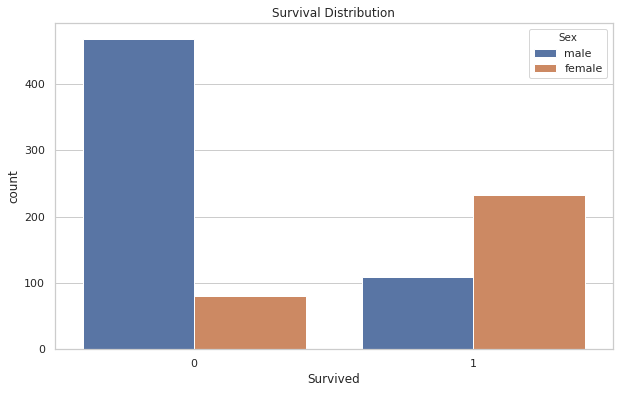

In [9]:
print(titanic_trainSet["Survived"].value_counts(sort=False))
print('-'*50)
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")
sb.countplot( x= 'Survived', hue='Sex', data=titanic_trainSet)
plt.title('Survival Distribution')
plt.show()

### Passenger Class

In [10]:
print("Passengers in each class\n")
titanic_trainSet["Pclass"].value_counts(sort=False)

Passengers in each class



1    216
2    184
3    491
Name: Pclass, dtype: int64

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


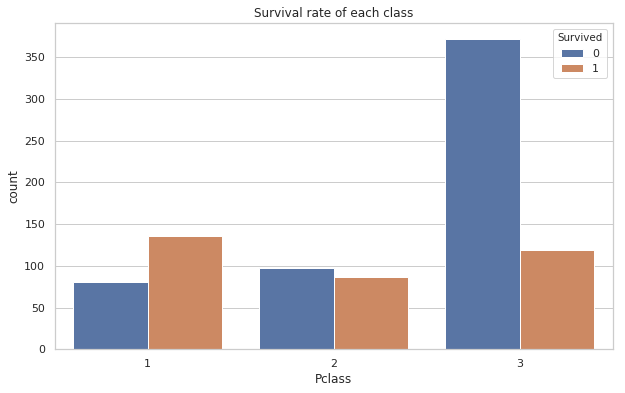

In [11]:
print(titanic_trainSet[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'Pclass', hue='Survived',data=titanic_trainSet)
plt.title('Survival rate of each class')
plt.show()

### Gender

In [12]:
print('Gender distribution\n')
print(titanic_trainSet["Sex"].value_counts(sort=False))

Gender distribution

female    314
male      577
Name: Sex, dtype: int64


      Sex  Survived
0  female  0.742038
1    male  0.188908


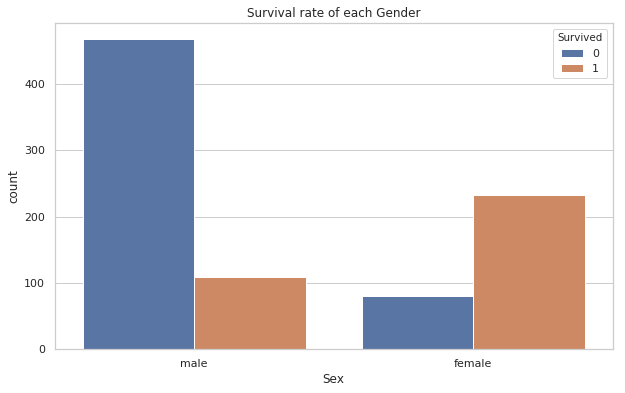

In [13]:
print(titanic_trainSet[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'Sex', hue='Survived',data=titanic_trainSet)
plt.title('Survival rate of each Gender')
plt.show()

### Embarked
### This attribute tells us where the passenger board the Titanic: C=Cherbourg, Q=Queenstown, S=Southampton.

In [14]:
print('Embarked distribution\n')
print(titanic_trainSet["Embarked"].value_counts(sort=False))

Embarked distribution

C    168
S    644
Q     77
Name: Embarked, dtype: int64


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


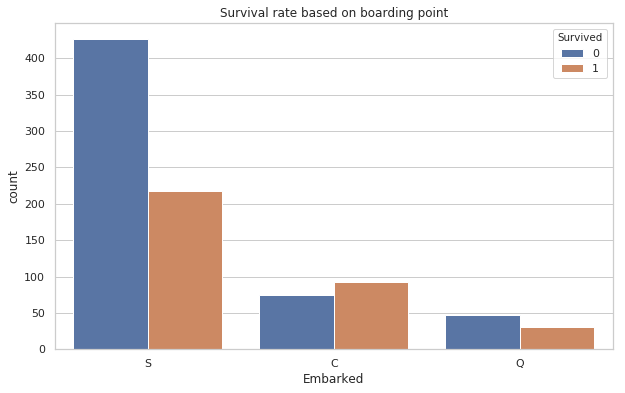

In [15]:
print(titanic_trainSet[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'Embarked', hue='Survived', data=titanic_trainSet)
plt.title('Survival rate based on boarding point')
plt.show()

# Feature Engineering

### Relatives Onboard
#### 'SibSp': tells how many siblings & spouses of the passenger aboard the Titanic.
#### 'Parch': tells how many children & parents of the passenger aboard the Titanic.
#### In whole, these two features are telling about the no. of relatives of a passenger aboard the ship. So we can add these two feature and make one i.e. 'RelativesOnboard'

In [0]:
for dataset in full_data:
    dataset['RelativesOnboard'] = dataset['SibSp'] + dataset['Parch']

In [17]:
print('Relatives distribution\n')
print(titanic_trainSet["RelativesOnboard"].value_counts(sort=False))

Relatives distribution

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: RelativesOnboard, dtype: int64


   RelativesOnboard  Survived
0                 0  0.303538
1                 1  0.552795
2                 2  0.578431
3                 3  0.724138
4                 4  0.200000
5                 5  0.136364
6                 6  0.333333
7                 7  0.000000
8                10  0.000000


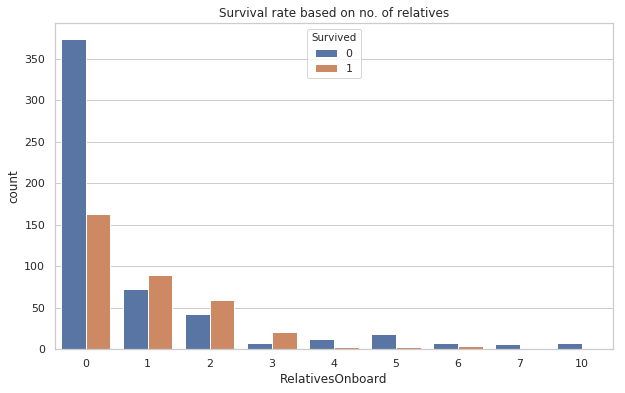

In [18]:
print(titanic_trainSet[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'RelativesOnboard', hue='Survived', data=titanic_trainSet)
plt.title('Survival rate based on no. of relatives')
plt.show()

### Age
#### 'Age' is a continuous attribute. But we can convert it into a categorical feature based on different age groups. And then we can find out the survival rate of each age group.

In [0]:
for dataset in full_data:
    dataset['AgeGroup'] = dataset['Age'] // 15 * 15

In [20]:
titanic_trainSet.isna().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
RelativesOnboard      0
AgeGroup            177
dtype: int64

In [0]:
titanic_copy = titanic_trainSet.copy()

In [0]:
median = titanic_copy['AgeGroup'].median()
titanic_copy['AgeGroup'] = titanic_copy['AgeGroup'].fillna(median)

In [23]:
print('Age distribution\n')
print(titanic_copy["AgeGroup"].value_counts(sort=False))

Age distribution

15.0    483
30.0    215
45.0     89
0.0      78
60.0     25
75.0      1
Name: AgeGroup, dtype: int64


   AgeGroup  Survived
0       0.0  0.576923
1      15.0  0.337474
2      30.0  0.423256
3      45.0  0.404494
4      60.0  0.240000
5      75.0  1.000000


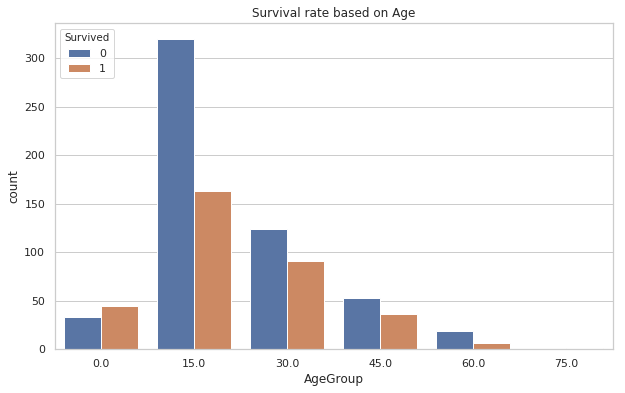

In [24]:
print(titanic_copy[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'AgeGroup', hue='Survived', data=titanic_copy)
plt.title('Survival rate based on Age')
plt.show()

### Name
#### We can use name attribute to parse out the 'Title' for each person and then use it as a categorical features.

In [25]:
titanic_trainSet['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
def parseTitle(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
  
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
  dataset['Title'] = dataset['Name'].apply(parseTitle)


In [27]:
print('Title distribution\n')
print(titanic_trainSet["Title"].value_counts(sort=False))

Title distribution

Col           2
Rev           6
Countess      1
Capt          1
Miss        182
Mr          517
Mme           1
Jonkheer      1
Major         2
Ms            1
Sir           1
Dr            7
Lady          1
Mlle          2
Master       40
Don           1
Mrs         125
Name: Title, dtype: int64


In [0]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [29]:
print('Title distribution\n')
print(titanic_trainSet["Title"].value_counts(sort=True))

Title distribution

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


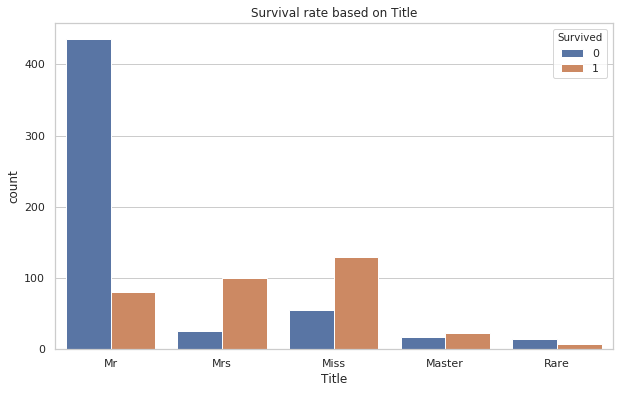

In [30]:
print(titanic_trainSet[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
plt.figure(figsize=(10, 6))
sb.countplot( x= 'Title', hue='Survived', data=titanic_trainSet)
plt.title('Survival rate based on Title')
plt.show()

## Feature Selection
### So, after analysing and processing the features, I have selected the final features for ML algorithms.

In [31]:
features_testSet = ['Pclass', 'Sex', 'Embarked', 'Fare', 'Title', 'AgeGroup', 'RelativesOnboard']
features_trainSet = features_testSet + ['Survived']

train_set = titanic_trainSet[[*features_trainSet]]
test_set = titanic_testSet[[*features_testSet]]

train_set.head()
  

,Pclass,Sex,Embarked,Fare,Title,AgeGroup,RelativesOnboard,Survived
0,3,male,S,7.2500,Mr,15.0,1,0
1,1,female,C,71.2833,Mrs,30.0,1,1
2,3,female,S,7.9250,Miss,15.0,0,1
3,1,female,S,53.1000,Mrs,30.0,1,1
4,3,male,S,8.0500,Mr,30.0,0,0


In [32]:
test_set.head()

,Pclass,Sex,Embarked,Fare,Title,AgeGroup,RelativesOnboard
0,3,male,Q,7.8292,Mr,30.0,0
1,3,female,S,7.0000,Mrs,45.0,1
2,2,male,Q,9.6875,Mr,60.0,0
3,3,male,S,8.6625,Mr,15.0,0
4,3,female,S,12.2875,Mrs,15.0,2


# Data Preprocessing
## Dealing with missing values and categorical values

In [0]:
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [0]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median"))])
cat_pipeline = Pipeline([("imputer", CategoricalImputer()), ("cat_encoder", OneHotEncoder(sparse=False))])

In [0]:
num_attribs = ['Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup', 'RelativesOnboard']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


## Separate the Features and Label

In [0]:
X_train = full_pipeline.fit_transform(train_set)
y_train = train_set["Survived"]

# Select and train a model
## `Before directly training on the test set, first train and evaluate on the training set. Also, try different ML algorithms and choose which fits best on the data.`

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [0]:
classifiers_Kscores = []
classifiers_accuracy = []
for clf in classifiers:
  clf_scores = cross_val_score(clf, X_train, y_train, cv=10)
  classifiers_Kscores.append(clf_scores)
  model_name = type(clf).__name__
  classifiers_accuracy.append(model_name+': '+str(format(clf_scores.mean()*100,'.2f')))

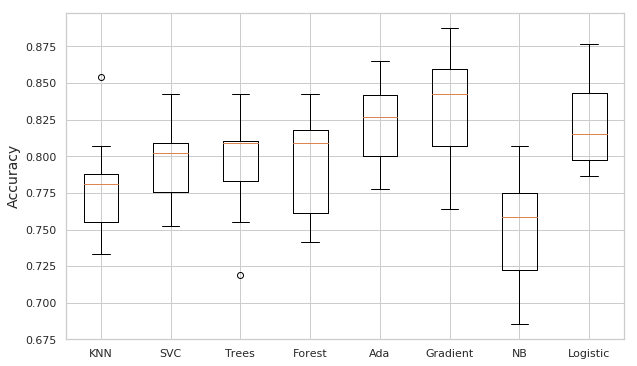



Classifiers Accuracy:


['KNeighborsClassifier: 77.90',
 'SVC: 79.58',
 'DecisionTreeClassifier: 79.69',
 'RandomForestClassifier: 79.47',
 'AdaBoostClassifier: 82.39',
 'GradientBoostingClassifier: 83.28',
 'GaussianNB: 75.10',
 'LogisticRegression: 82.38']

In [49]:
plt.figure(figsize=(10, 6))
plt.boxplot(classifiers_Kscores, labels=("KNN","SVC","Trees","Forest","Ada","Gradient","NB","Logistic"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

print("\n\nClassifiers Accuracy:")
classifiers_accuracy


## Accuracy Score is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).
## Instead, we will calculate the F1_score for each classifier, which is the weighted average of the precision and recall.
## F1 = 2 * (precision * recall) / (precision + recall)

In [0]:
splits = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_index, test_index in splits.split(X_train, y_train):
  X_train1, X_test1 = X_train[train_index], X_train[test_index]
  y_train1, y_test1 = y_train[train_index], y_train[test_index]

In [41]:

f1_scores = []
for clf in classifiers:
  clf.fit(X_train1, y_train1)
  pred = clf.predict(X_test1)
  model_name = type(clf).__name__
  f1_scores.append((model_name+': '+str(format(f1_score(y_test1, pred)*100,'.2f'))))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
f1_scores

['KNeighborsClassifier: 66.16',
 'SVC: 74.63',
 'DecisionTreeClassifier: 70.72',
 'RandomForestClassifier: 74.13',
 'AdaBoostClassifier: 77.15',
 'GradientBoostingClassifier: 74.51',
 'GaussianNB: 72.16',
 'LogisticRegression: 77.27']

# Evaluate the model on the Test Set

In [0]:
X_test = full_pipeline.fit_transform(test_set)

In [0]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)

In [0]:
passengerID =np.array(titanic_testSet["PassengerId"]).astype(int)
titanicSurvival_predictions = pd.DataFrame(y_pred, passengerID, columns = ["Survived"])

titanicSurvival_predictions.to_csv("/content/drive/My Drive/Titanic_Survival_Predictions_logistic.csv", index_label = ["PassengerId"])